# Autocalibration
## Step 4. [VEGN-leave-stem-root]
### Part 1 (combining NPP, VEGC, and VEGN)

In [1]:
import Mads
import PyCall
@show pwd()

pwd() = "/work/scripts"


"/work/scripts"

In [7]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run()

    return dvmdostem.get_calibration_outputs()[24:64]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[24:64]#[24:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)', \
                                       'nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)', \
                                       'nfall(1)','nfall(1)','nfall(1)', \
                                       'nfall(2)','nfall(2)','nfall(2)','nfall(2)','nfall(2)'], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4])
"""

initial_guess=[0.09, 0.11, 0.080, 0.057, 0.045, 0.096, 0.099, 0.04, 
               4.4595e-5, 0.0007, 0.0004,
               0.00138, 0.0003, 8.2057e-5, 0.021, 0.0003,
                -0.10, -0.22, -2.29, -1.22, -3.3, -0.15, -0.1, -1.24, 
                -7.27, -5.58, -5.77, 
                -6.63, -6.3, -3.86, -0.81, -4.32,
                0.00001, 0.00002, 0.000014, 0.00007, 0.0001, 0.0010, 0.00353, 0.0001,
                0.000001, 0.000159, 0.000017,
                0.00001, 0.010048, 0.000008, 0.00688, 0.000013]

#y_init=PyCall.py"run_TEM"()

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()
obs_time=1:length(obs)
#1:46

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:40

In [30]:
obsweight=[10,100,100,10,10,10,50,100,100,100,50,10,10,50,100,100,
           100,100,100,100,100,100,100,100    ]
1:length(obsweight)

1:24

In [31]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24",
              "krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24",
              "nfall00","nfall01","nfall02","nfall03","nfall04","nfall05","nfall06","nfall07",
              "nfall10","nfall11","nfall12",
              "nfall20","nfall21","nfall22","nfall23","nfall24"],
    paramdist=["Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)",
        "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)",
        "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
        "Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
        "Uniform(1e-7, 0.09)"],
    obstime=obs_time,
    paramlog=[trues(16); falses(16); trues(16)],
    problemname="Calibration_VEGN")

Mads.showparameters(md)
Mads.showobservations(md)

cfall00 =            0.09 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall01 =            0.11 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall02 =            0.08 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall03 =           0.057 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall04 =           0.045 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall05 =           0.096 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall06 =           0.099 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall07 =            0.04 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall10 =      4.4595e-05 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall11 =          0.0007 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall12 =          0.0004 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall20 =         0.00138 log-transformed distribution = Uniform(0.00001, 0.09) 
cfall21 =          0.0003 log-transf

In [35]:
#localsa = Mads.localsa(md; filename="model_diagnostics.png", par=init_guess)
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=collect(values(calib_param)))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


┌ Warning: 2022-09-17 15:19:21 Parameters without any impact on the observations:
└ @ Mads /home/develop/.julia/packages/Mads/I5bBG/src/MadsLog.jl:53


nfall21
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/w

Dict{String, Any} with 6 entries:
  "of"          => 1.11916e5
  "jacobian"    => [13.47 -0.0268783 … 2.4349 0.245424; 0.00878074 0.31456 … -0…
  "covar"       => [74.141 3.2161 … 3584.56 -77667.5; 7.25397 3.95271 … -783.93…
  "eigenmatrix" => [-0.00265679 -0.141924 … 1.20738e-7 7.83503e-7; -5.60381e-5 …
  "eigenvalues" => [5.15597e-6, 5.64735e-5, 0.000130747, 0.000133006, 0.0011961…
  "stddev"      => [8.61051, 1.98814, 7.90513, 4.96931, 1.08964, 0.279508, 0.50…

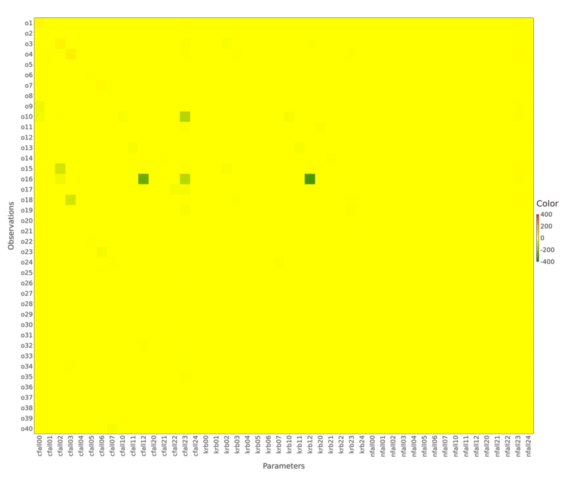

In [36]:
Mads.display("model_diagnostics-jacobian.png")

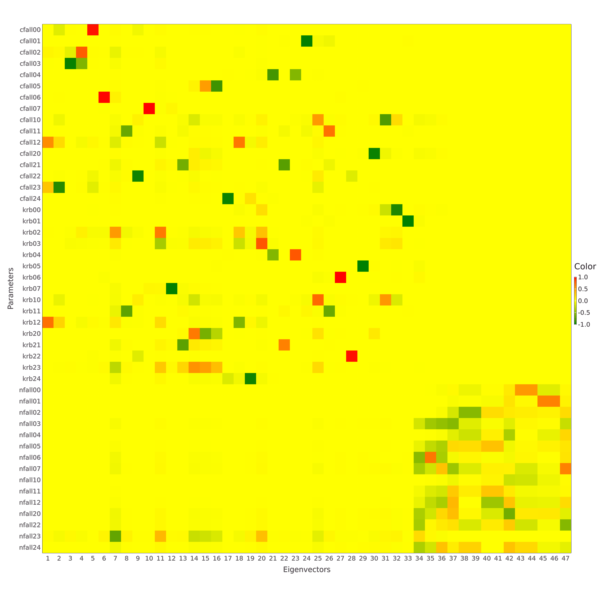

In [37]:
Mads.display("model_diagnostics-eigenmatrix.png")

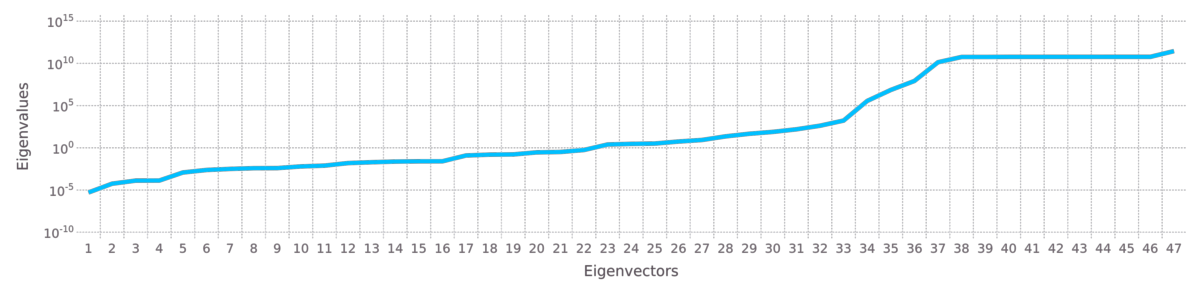

In [38]:
Mads.display("model_diagnostics-eigenvalues.png")

In [32]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=4)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

(OrderedCollections.OrderedDict("cfall00" => 0.08255508717239629, "cfall01" => 0.11014595077581762, "cfall02" => 0.07941036110838799, "cfall03" => 0.11383481422616254, "cfall04" => 0.04521686690705912, "cfall05" => 0.06753606608273267, "cfall06" => 0.016369802031859976, "cfall07" => 0.0013947406782984458, "cfall10" => 1.4038755628796344e-5, "cfall11" => 0.0006623104409075637…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [0.9949690648761715, 1.074321953711466, 0.9526531769570868, 0.8427866198617268, 0.7736650000855532, 1.0193651954002685, 1.0313435940591384, 0.740931532960472, -0.7363664832136664, -0.06682520166700674  …  0.45950220506385264, -0.047792920632670904, -0.7262961438976753, 0.07540456856876279, -0.2535101616426897, -0.33440807966011693, 0.7479990101963959, -0.3690844420144285, 0.6750310209643884, -0.2941611138199008], [0.9636948759125427, 1.0748844070958314, 0.9500798902397158, 1.0890513460419067, 0.775023142

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


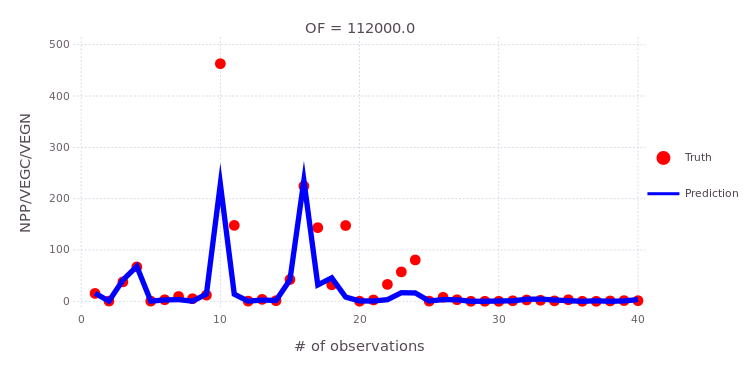

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [39]:
Mads.plotmatches(md, calib_param, xtitle="# of observations", ytitle="NPP/VEGC/VEGN")

## round2 (all together)

In [45]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[16:64]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[16:64]#[24:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax', \
                                       'cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)', \
                                       'nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)', \
                                       'nfall(1)','nfall(1)','nfall(1)', \
                                       'nfall(2)','nfall(2)','nfall(2)','nfall(2)','nfall(2)'], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4])
"""

initial_guess=[92.0, 3.01, 227.74, 388.18, 2.34, 21.93, 61.34, 32.27,
               0.09, 0.11, 0.080, 0.057, 0.045, 0.096, 0.099, 0.04, 
               4.4595e-5, 0.0007, 0.0004,
               0.00138, 0.0003, 8.2057e-5, 0.021, 0.0003,
                -0.10, -0.22, -2.29, -1.22, -3.3, -0.15, -0.1, -1.24, 
                -7.27, -5.58, -5.77, 
                -6.63, -6.3, -3.86, -0.81, -4.32,
                0.00001, 0.00002, 0.000014, 0.00007, 0.0001, 0.0010, 0.00353, 0.0001,
                0.000001, 0.000159, 0.000017,
                0.00001, 0.010048, 0.000008, 0.00688, 0.000013]

#y_init=PyCall.py"run_TEM"()

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)
#1:46

Loading calibration_targets from : ['/work/calibration']
Resetting path...


1:48

In [46]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cmax0","cmax1","cmax2","cmax3","cmax4","cmax5","cmax6","cmax7",
              "cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24",
              "krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24",
              "nfall00","nfall01","nfall02","nfall03","nfall04","nfall05","nfall06","nfall07",
              "nfall10","nfall11","nfall12",
              "nfall20","nfall21","nfall22","nfall23","nfall24"],
    paramdist=["Uniform(0.1, 200)","Uniform(0.1, 90)","Uniform(0.1, 350)","Uniform(0.1, 600)",
               "Uniform(0.1, 50)","Uniform(0.1, 350)","Uniform(0.1, 200)","Uniform(0.1, 150)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)",
        "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)",
        "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
        "Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
        "Uniform(1e-7, 0.09)"],
    obstime=obs_time,
    paramlog=[falses(8); trues(16); falses(16); trues(16)],
    problemname="Calibration_ALL")

Mads.showparameters(md)
Mads.showobservations(md)

cmax0   =              92 distribution = Uniform(0.1, 200) 
cmax1   =            3.01 distribution = Uniform(0.1, 90) 
cmax2   =          227.74 distribution = Uniform(0.1, 350) 
cmax3   =          388.18 distribution = Uniform(0.1, 600) 
cmax4   =            2.34 distribution = Uniform(0.1, 50) 
cmax5   =           21.93 distribution = Uniform(0.1, 350) 
cmax6   =           61.34 distribution = Uniform(0.1, 200) 
cmax7   =           32.27 distribution = Uniform(0.1, 150) 
cfall00 =            0.09 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall01 =            0.11 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall02 =            0.08 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall03 =           0.057 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall04 =           0.045 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall05 =           0.096 log-transformed distribution = Uniform(0.00001, 0.2) 
cfall06 =           0.099 log-transformed 

In [47]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=4)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/

(OrderedCollections.OrderedDict("cmax0" => 184.28623427368544, "cmax1" => 3.1162878115214943, "cmax2" => 249.87296936240597, "cmax3" => 422.55903821289314, "cmax4" => 2.3812830290645235, "cmax5" => 42.18245075055047, "cmax6" => 92.41116618409878, "cmax7" => 82.24867131540053, "cfall00" => 0.08941283769159233, "cfall01" => 0.11001952085233585…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.08062759919193205, -1.2089968559799005, 0.3059212334312905, 0.2982162290497598, -1.1438160572130256, -1.0658935174501627, -0.39769433046739733, -0.60745611732319, 0.9949690648761715, 1.074321953711466  …  0.45950220506385264, -0.047792920632670904, -0.7262961438976753, 0.07540456856876279, -0.2535101616426897, -0.33440807966011693, 0.7479990101963959, -0.3690844420144285, 0.6750310209643884, -0.2941611138199008], [1.0024342747184904, -1.2023743521906076, 0.44192687850293316, 0.4207350760336373, -1.1398379439244102, -0.862482846084914

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


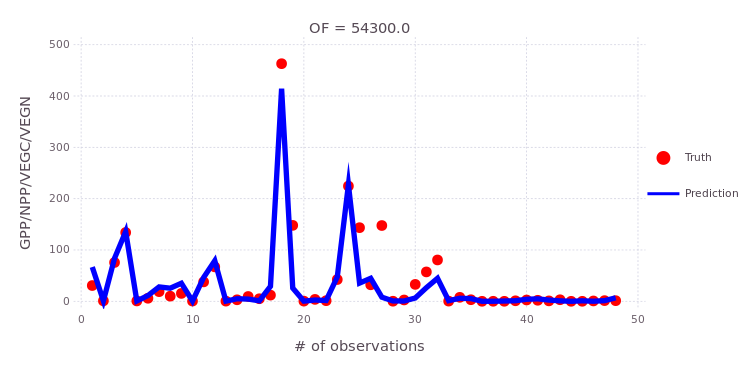

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [48]:
Mads.plotmatches(md, calib_param, xtitle="# of observations", ytitle="GPP/NPP/VEGC/VEGN")

In [49]:
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=collect(values(calib_param)))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


┌ Warning: 2022-09-18 17:43:17 Parameters without any impact on the observations:
└ @ Mads /home/develop/.julia/packages/Mads/I5bBG/src/MadsLog.jl:53


nfall21
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js



Dict{String, Any} with 6 entries:
  "of"          => 54288.8
  "jacobian"    => [19.4056 -0.308366 … 7.55696 0.409562; -0.00309865 5.33373 ……
  "covar"       => [66289.0 -66.6748 … -2.17653e5 408262.0; 145.281 29.4145 … 4…
  "eigenmatrix" => [-0.0890413 -0.233799 … 9.53853e-6 9.53853e-6; -0.000608892 …
  "eigenvalues" => [3.47218e-6, 6.77062e-6, 8.58489e-5, 9.2401e-5, 0.000174875,…
  "stddev"      => [257.466, 5.42352, 80.321, 59.7709, 6.35179, 10.8872, 26.997…

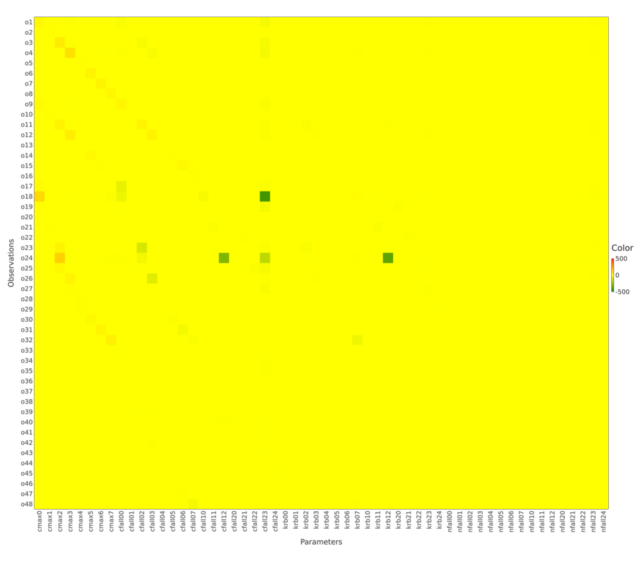

In [50]:
Mads.display("model_diagnostics-jacobian.png")

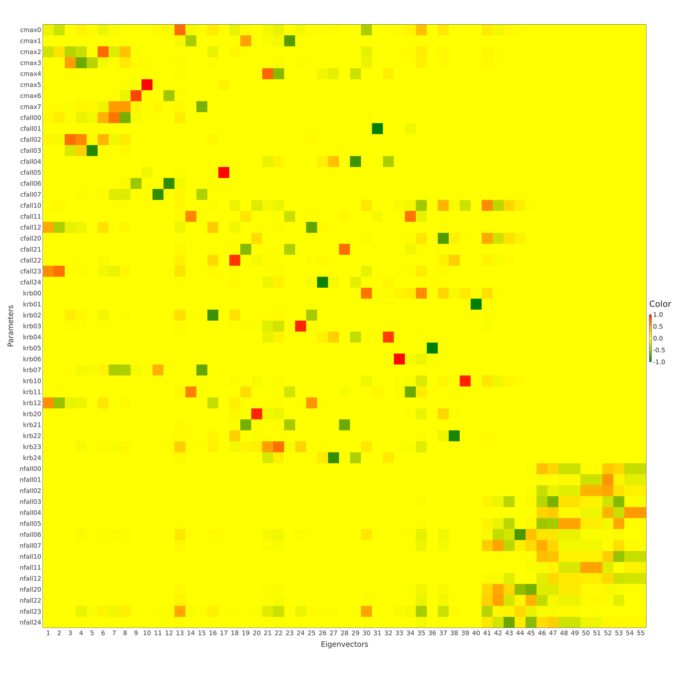

In [51]:
Mads.display("model_diagnostics-eigenmatrix.png")

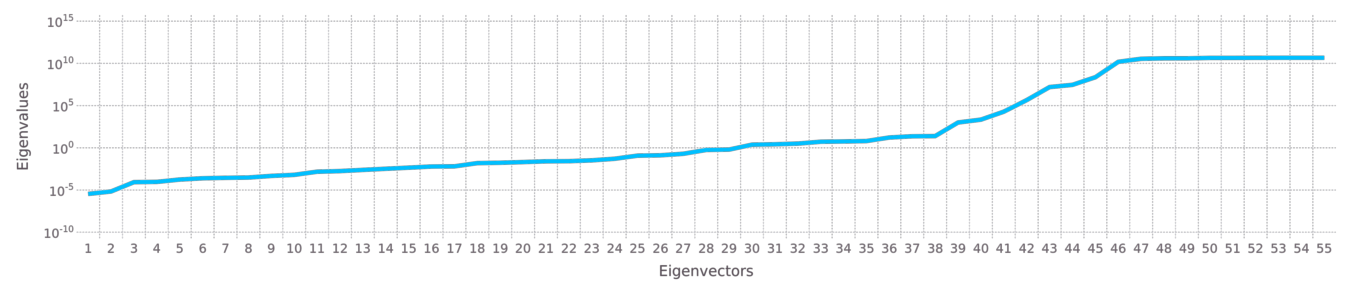

In [55]:
Mads.display("model_diagnostics-eigenvalues.png")

## round 3

In [53]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=4)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/sin

/data/workflows/single_run/config/output_spec.csv File present!NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_L

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/

(OrderedCollections.OrderedDict("cmax0" => 184.28623427368544, "cmax1" => 3.1162878115214943, "cmax2" => 249.87296936240597, "cmax3" => 422.55903821289314, "cmax4" => 2.3812830290645235, "cmax5" => 42.18245075055047, "cmax6" => 92.41116618409878, "cmax7" => 82.24867131540053, "cfall00" => 0.08941283769159233, "cfall01" => 0.11001952085233585…), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.08062759919193205, -1.2089968559799005, 0.3059212334312905, 0.2982162290497598, -1.1438160572130256, -1.0658935174501627, -0.39769433046739733, -0.60745611732319, 0.9949690648761715, 1.074321953711466  …  0.45950220506385264, -0.047792920632670904, -0.7262961438976753, 0.07540456856876279, -0.2535101616426897, -0.33440807966011693, 0.7479990101963959, -0.3690844420144285, 0.6750310209643884, -0.2941611138199008], [1.0024342747184904, -1.2023743521906076, 0.44192687850293316, 0.4207350760336373, -1.1398379439244102, -0.862482846084914

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


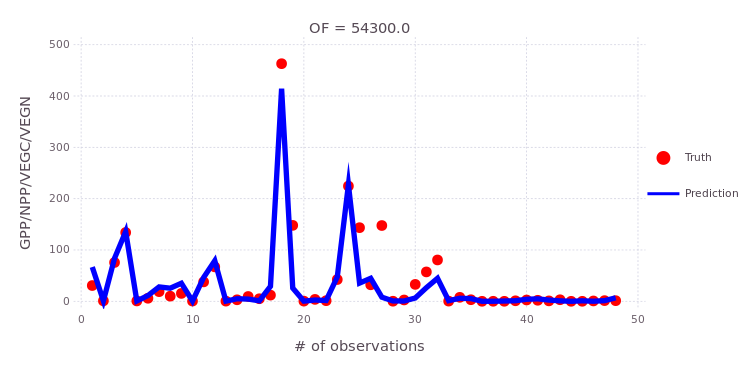

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 --cal-mode --log-level err --tar-caljson --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /w

In [54]:
Mads.plotmatches(md, calib_param, xtitle="# of observations", ytitle="GPP/NPP/VEGC/VEGN")

## round 4 (soil parameters)

In [6]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[16:]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[16:]#[24:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax', \
                                       'cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)', \
                                       'nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)', \
                                       'nfall(1)','nfall(1)','nfall(1)', \
                                       'nfall(2)','nfall(2)','nfall(2)','nfall(2)','nfall(2)', \
                                       'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4,
                                        None,None,None,None,None])
"""
initial_guess=[184.29, 3.12, 249.87, 422.56, 2.38, 42.18, 92.41, 82.25, 
0.08941, 0.11002, 0.07837, 0.13141, 0.04513, 0.06237, 0.0135, 0.00177, 1.48646e-5, 0.00066, 0.000206, 
1.5329e-5, 0.00029, 4.05597e-5, 0.006813, 0.00030, 
-0.100120, -0.22001, -1.84567, -0.27873, -3.297177, -0.152216, -0.1001769, -2.24337, -9.97208, 
-5.652818, -6.58072, -8.30524, -6.28995, -9.356503, -1.953319, -4.3518265, 
1.0001162e-5, 1.999995e-5, 1.4001e-5, 6.81852e-5, 0.0001, 0.001, 0.004086, 9.96467e-5, 1.00001e-6, 
0.0001589, 1.69992e-5, 9.98886e-6, 0.010048, 7.84015e-6, 0.00573, 1.27048e-5,
0.7, 0.095, 0.027, 0.024, 0.000005]

#y_init=PyCall.py"run_TEM"()

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)
#1:46

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/develop/.julia/packages/PyCall/ygXW2/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'FileNotFoundError'>
FileNotFoundError(2, 'No such file or directory')
  File "/home/develop/.julia/packages/PyCall/ygXW2/src/pyeval.jl", line 19, in get_param_targets
    end
  File "/work/scripts/TEM.py", line 378, in get_calibration_outputs
    with nc.Dataset(os.path.join(output_directory_path, 'CMTNUM_yearly_eq.nc'), 'r') as ds:
  File "src/netCDF4/_netCDF4.pyx", line 2353, in netCDF4._netCDF4.Dataset.__init__
  File "src/netCDF4/_netCDF4.pyx", line 1963, in netCDF4._netCDF4._ensure_nc_success


In [7]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["cmax0","cmax1","cmax2","cmax3","cmax4","cmax5","cmax6","cmax7",
              "cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              "cfall10","cfall11","cfall12",
              "cfall20","cfall21","cfall22","cfall23","cfall24",
              "krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              "krb10","krb11","krb12",
              "krb20","krb21","krb22","krb23","krb24",
              "nfall00","nfall01","nfall02","nfall03","nfall04","nfall05","nfall06","nfall07",
              "nfall10","nfall11","nfall12",
              "nfall20","nfall21","nfall22","nfall23","nfall24",
              "micbnup","kdcrawc","kdcsoma","kdcsompr","kdcsomcr"],
    paramdist=["Uniform(0.1, 200)","Uniform(0.1, 90)","Uniform(0.1, 350)","Uniform(0.1, 600)",
               "Uniform(0.1, 50)","Uniform(0.1, 350)","Uniform(0.1, 200)","Uniform(0.1, 150)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
        "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
        "Uniform(0.00001, 0.09)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
        "Uniform(-10, -0.1)",
        "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)",
        "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
        "Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
        "Uniform(1e-7, 0.09)",
        "Uniform(1e-1, 2.0)","Uniform(1e-3, 0.99)","Uniform(5e-3, 0.5)","Uniform(1e-3, 0.25)","Uniform(1e-7, 1e-5)"],
    obstime=obs_time,
    obsweight=[0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,100,
                100,100,0,100],
    paramlog=[falses(8); trues(16); falses(16); trues(16); falses(4); trues(1)],
    problemname="Calibration_WSOIL")
# "dmossc", "shlwc", "deepc", "minec", "soln", "avln"
Mads.showparameters(md)
Mads.showobservations(md)

LoadError: UndefVarError: obs_time not defined

In [ ]:
obsweight=[ 100,100,100,0,100 ]

In [6]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[16:]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[16:]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 200 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax', \
                                       'cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       'cfall(1)','cfall(1)','cfall(1)', \
                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       'krb(1)','krb(1)','krb(1)',  \
                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)', \
                                       'nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)', \
                                       'nfall(1)','nfall(1)','nfall(1)', \
                                       'nfall(2)','nfall(2)','nfall(2)','nfall(2)','nfall(2)'],\  #, \
                                       #'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'], \
                               pftnums=[0,1,2,3,4,5,6,7, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4, \
                                        0,1,2,3,4,5,6,7, \
                                        0,1,2, \
                                        0,1,2,3,4]) # \
                                        #None,None,None,None,None])
"""

initial_guess=[184.29, 3.12, 249.87, 422.56, 2.38, 42.18, 92.41, 82.25, 
0.08941, 0.11002, 0.07837, 0.13141, 0.04513, 0.06237, 0.0135, 0.00177, 1.48646e-5, 0.00066, 0.000206, 
1.5329e-5, 0.00029, 4.05597e-5, 0.006813, 0.00030, 
-0.100120, -0.22001, -1.84567, -0.27873, -3.297177, -0.152216, -0.1001769, -2.24337, -9.97208, 
-5.652818, -6.58072, -8.30524, -6.28995, -9.356503, -1.953319, -4.3518265, 
1.0001162e-5, 1.999995e-5, 1.4001e-5, 6.81852e-5, 0.0001, 0.001, 0.004086, 9.96467e-5, 1.00001e-6, 
0.0001589, 1.69992e-5, 9.98886e-6, 0.010048, 7.84015e-6, 0.00573, 1.27048e-5]
#0.7, 0.095, 0.027, 0.024, 0.000005]

#y_init=PyCall.py"run_TEM"()

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)
obs

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/develop/.julia/packages/PyCall/ygXW2/src/pyeval.jl:34 =# @pysym(:Py_CompileString), PyPtr, (Cstring, Cstring, Cint), s, fname, input_type))))) <class 'SyntaxError'>
SyntaxError('unexpected character after line continuation character', ('/home/develop/.julia/packages/PyCall/ygXW2/src/pyeval.jl', 33, 975, "dvmdostem.set_params(cmtnum=5, params=['cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax', \\\n                                       'cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \\\n                                       'cfall(1)','cfall(1)','cfall(1)', \\\n                                       'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \\\n                                       'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \\\n                                       'krb(1)','krb(1)','krb(1)',  \\\n                                       'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)', \\\n                                       'nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)', \\\n                                       'nfall(1)','nfall(1)','nfall(1)', \\\n                                       'nfall(2)','nfall(2)','nfall(2)','nfall(2)','nfall(2)'], \\ \n"))


In [9]:
PyCall.py"""
import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run(calib=True)

    return dvmdostem.get_calibration_outputs()[-5:]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[-5:]

dvmdostem=TEM.TEM_model()
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'], \
                               pftnums=[None,None,None,None,None])

"""

initial_guess=[0.7, 0.095, 0.027, 0.024, 0.000005]

#y_init=PyCall.py"run_TEM"(initial_guess)

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)
#SHLWC = 3079.00
#DEEPC = 7703.00
#MINEC = 43404.00
#AVLN = 0.8
obs

Loading calibration_targets from : ['/work/calibration']
Resetting path...


5-element Vector{Float64}:
  3079.0
  7703.0
 43404.0
  2206.0
     0.8

In [10]:
md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["micbnup", "kdcrawc", "kdcsoma", "kdcsompr", "kdcsomcr"],
    paramdist=["Uniform(1e-1, 2.0)","Uniform(1e-3, 0.99)","Uniform(5e-3, 0.5)",
               "Uniform(1e-3, 0.25)","Uniform(1e-7, 1e-5)"],
    obstime=obs_time,
    paramlog=[ falses(4); trues(1)  ], 
    obsweight=[ 100,100,100,0,100 ],  
    problemname="Calibration_SOIL")

#micbnup  	0.750000   	[0.1 to 2.0]  	target = AVLN    
#kdcrawc		0.091946	    	[0.01 to 0.99]	target = SHLWC 
#kdcsoma 		0.0230919    	[0.005 to 0.50]	target = SHLWC primarily and DEEPC secondary
#kdcsompr 	0.020800    	[0.001 to 0.25	target = DEEPC primarily and SHLWC and MINEC secondary
#kdcsomcr 	0.000005    	[0.000001 to 0.00001] 	target = MINEC 

0.750000     // micbnup
0.091946     // kdcrawc
0.023092     // kdcsoma
0.020800     // kdcsompr
0.000005     // kdcsomcr

Mads.showparameters(md)
Mads.showobservations(md)

micbnup  =             0.7 distribution = Uniform(1e-1, 2.0) 
kdcrawc  =           0.095 distribution = Uniform(1e-3, 0.99) 
kdcsoma  =           0.027 distribution = Uniform(5e-3, 0.5) 
kdcsompr =           0.024 distribution = Uniform(1e-3, 0.25) 
kdcsomcr =           5e-06 log-transformed distribution = Uniform(1e-7, 1e-5) 
Number of optimizable parameters: 5
o1         target =            3079 weight =             100 time =               1
o2         target =            7703 weight =             100 time =               2
o3         target =           43404 weight =             100 time =               3
o4         target =            2206 weight =               0 time =               4
o5         target =             0.8 weight =             100 time =               5
Number of observations is 5


In [ ]:
localsa = Mads.localsa(md; filename="model_diagnostics.png", par=initial_guess)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


In [4]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=4)

LoadError: UndefVarError: md not defined

In [ ]:
Mads.plotmatches(md, calib_param, xtitle="# of observations", ytitle="CSOIL")

In [8]:
PyCall.py"""

import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run()

    return dvmdostem.get_calibration_outputs()[16:]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[16:]#[24:48]

dvmdostem=TEM.TEM_model()
dvmdostem.calib_mode='VEGC'
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=[#'cmax','cmax','cmax','cmax','cmax','cmax','cmax','cmax', \
                                       #'cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)','cfall(0)', \
                                       #'cfall(1)','cfall(1)','cfall(1)', \
                                       #'cfall(2)','cfall(2)','cfall(2)','cfall(2)','cfall(2)', \
                                       #'krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)','krb(0)', \
                                       #'krb(1)','krb(1)','krb(1)',  \
                                       #'krb(2)','krb(2)','krb(2)','krb(2)','krb(2)', \
                                       #'nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)','nfall(0)', \
                                       #'nfall(1)','nfall(1)','nfall(1)', \
                                       #'nfall(2)','nfall(2)','nfall(2)','nfall(2)','nfall(2)', \
                                       'micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'], \
                               pftnums=[#0,1,2,3,4,5,6,7, \
                                        #0,1,2,3,4,5,6,7, \
                                        #0,1,2, \
                                        #0,1,2,3,4, \
                                        #0,1,2,3,4,5,6,7, \
                                        #0,1,2, \
                                        #0,1,2,3,4, \
                                        #0,1,2,3,4,5,6,7, \
                                        #0,1,2, \
                                        #0,1,2,3,4,
                                        None,None,None,None,None])
"""
initial_guess=[#184.29, 3.12, 249.87, 422.56, 2.38, 42.18, 92.41, 82.25, 
#0.08941, 0.11002, 0.07837, 0.13141, 0.04513, 0.06237, 0.0135, 0.00177, 1.48646e-5, 0.00066, 0.000206, 
#1.5329e-5, 0.00029, 4.05597e-5, 0.006813, 0.00030, 
#-0.100120, -0.22001, -1.84567, -0.27873, -3.297177, -0.152216, -0.1001769, -2.24337, -9.97208, 
#-5.652818, -6.58072, -8.30524, -6.28995, -9.356503, -1.953319, -4.3518265, 
#1.0001162e-5, 1.999995e-5, 1.4001e-5, 6.81852e-5, 0.0001, 0.001, 0.004086, 9.96467e-5, 1.00001e-6, 
#0.0001589, 1.69992e-5, 9.98886e-6, 0.010048, 7.84015e-6, 0.00573, 1.27048e-5,
0.7, 0.095, 0.027, 0.024, 0.000005]

#y_init=PyCall.py"run_TEM"()

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)

md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=[#"cmax0","cmax1","cmax2","cmax3","cmax4","cmax5","cmax6","cmax7",
              #"cfall00","cfall01","cfall02","cfall03","cfall04","cfall05","cfall06","cfall07",
              #"cfall10","cfall11","cfall12",
              #"cfall20","cfall21","cfall22","cfall23","cfall24",
              #"krb00","krb01","krb02","krb03","krb04","krb05","krb06","krb07",
              #"krb10","krb11","krb12",
              #"krb20","krb21","krb22","krb23","krb24",
              #"nfall00","nfall01","nfall02","nfall03","nfall04","nfall05","nfall06","nfall07",
              #"nfall10","nfall11","nfall12",
              #"nfall20","nfall21","nfall22","nfall23","nfall24",
              "micbnup","kdcrawc","kdcsoma","kdcsompr","kdcsomcr"],
    paramdist=[#"Uniform(0.1, 200)","Uniform(0.1, 90)","Uniform(0.1, 350)","Uniform(0.1, 600)",
               #"Uniform(0.1, 50)","Uniform(0.1, 350)","Uniform(0.1, 200)","Uniform(0.1, 150)",
       # "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)",
       # "Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.2)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
       # "Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)","Uniform(0.00001, 0.09)",
       # "Uniform(0.00001, 0.09)",
       # "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-15, -0.1)","Uniform(-10, -0.1)",
       # "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
       # "Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)","Uniform(-10, -0.1)",
       # "Uniform(-10, -0.1)",
       # "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)",
       # "Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.2)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
       # "Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)","Uniform(1e-7, 0.09)",
       # "Uniform(1e-7, 0.09)",
        "Uniform(1e-1, 2.0)","Uniform(1e-3, 0.99)","Uniform(5e-3, 0.5)","Uniform(1e-3, 0.25)","Uniform(1e-7, 1e-5)"],
    obstime=obs_time,
    obsweight=[0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,0,
                0,0,0,0,0,0,0,0,0,100,
                100,100,0,100],
    paramlog=[falses(8); trues(16); falses(16); trues(16); falses(4); trues(1)],
    problemname="Calibration_WSOIL")
# "dmossc", "shlwc", "deepc", "minec", "soln", "avln"
Mads.showparameters(md)
Mads.showobservations(md)

micbnup  =             0.7 distribution = Uniform(1e-1, 2.0) 
kdcrawc  =           0.095 distribution = Uniform(1e-3, 0.99) 
kdcsoma  =           0.027 distribution = Uniform(5e-3, 0.5) 
kdcsompr =           0.024 distribution = Uniform(1e-3, 0.25) 
kdcsomcr =           5e-06 distribution = Uniform(1e-7, 1e-5) 
Number of optimizable parameters: 5
o1         target =           30.71 weight =               0 time =               1
o2         target =            0.89 weight =               0 time =               2
o3         target =           75.63 weight =               0 time =               3
o4         target =          134.04 weight =               0 time =               4
o5         target =           0.686 weight =               0 time =               5
o6         target =            5.92 weight =               0 time =               6
o7         target =           18.79 weight =               0 time =               7
o8         target =           10.01 weight =               0 ti

## STEP5

In [2]:
PyCall.py"""
import sys,os
sys.path.append(os.path.join('/work','scripts'))
import TEM

def run_TEM(x):
    
    for j in range(len(dvmdostem.params)):
        dvmdostem.params[j]['val']=x[j]   
    # update param files
    dvmdostem.clean()
    dvmdostem.setup(calib=True)
    dvmdostem.update_params()
    dvmdostem.run()

    return dvmdostem.get_calibration_outputs()[-5:]

def get_param_targets():
    return dvmdostem.get_calibration_outputs(calib=True)[-5:]

dvmdostem=TEM.TEM_model()
dvmdostem.opt_run_setup='--pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0'
dvmdostem.set_params(cmtnum=5, params=['micbnup','kdcrawc','kdcsoma','kdcsompr','kdcsomcr'], \
                               pftnums=[None,None,None,None,None])

"""

initial_guess=[0.7, 0.095, 0.027, 0.024, 0.000005]

#y_init=PyCall.py"run_TEM"(initial_guess)

function TEM_pycall(parameters::AbstractVector)
        predictions = PyCall.py"run_TEM"(parameters)
        return predictions
end
obs=PyCall.py"get_param_targets"()# VEGC only
obs_time=1:length(obs)
#SHLWC = 3079.00
#DEEPC = 7703.00
#MINEC = 43404.00
#AVLN = 0.8
obs

md = Mads.createproblem(initial_guess, obs, TEM_pycall;
    paramkey=["micbnup", "kdcrawc", "kdcsoma", "kdcsompr", "kdcsomcr"],
    paramdist=["Uniform(1e-1, 2.0)","Uniform(1e-3, 0.99)","Uniform(5e-3, 0.5)",
               "Uniform(1e-3, 0.25)","Uniform(1e-7, 1e-5)"],
    obstime=obs_time,
    paramlog=[ falses(4); trues(1)  ], 
    obsweight=[ 100,100,100,0,100 ],  
    problemname="Calibration_SOIL")

#micbnup  	0.750000   	[0.1 to 2.0]  	target = AVLN    
#kdcrawc		0.091946	    	[0.01 to 0.99]	target = SHLWC 
#kdcsoma 		0.0230919    	[0.005 to 0.50]	target = SHLWC primarily and DEEPC secondary
#kdcsompr 	0.020800    	[0.001 to 0.25	target = DEEPC primarily and SHLWC and MINEC secondary
#kdcsomcr 	0.000005    	[0.000001 to 0.00001] 	target = MINEC 

Mads.showparameters(md)
Mads.showobservations(md)

micbnup  =             0.7 distribution = Uniform(1e-1, 2.0) 
kdcrawc  =           0.095 distribution = Uniform(1e-3, 0.99) 
kdcsoma  =           0.027 distribution = Uniform(5e-3, 0.5) 
kdcsompr =           0.024 distribution = Uniform(1e-3, 0.25) 
kdcsomcr =           5e-06 log-transformed distribution = Uniform(1e-7, 1e-5) 
Number of optimizable parameters: 5
o1         target =            3079 weight =             100 time =               1
o2         target =            7703 weight =             100 time =               2
o3         target =           43404 weight =             100 time =               3
o4         target =            2206 weight =               0 time =               4
o5         target =             0.8 weight =             100 time =               5
Number of observations is 5
Loading calibration_targets from : ['/work/calibration']
Resetting path...


In [14]:
Mads.forward(md)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/c

OrderedCollections.OrderedDict{Any, Float64} with 5 entries:
  "o1" => 2165.16
  "o2" => 4736.48
  "o3" => 38732.3
  "o4" => 2038.97
  "o5" => 21.2038

In [3]:
calib_param, calib_information = Mads.calibrate(md, tolOF=0.01, tolOFcount=4)

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outs

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/script

Loading calibration_targets from : ['/work/calibration']NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!

Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/sin

NOTE: Make sure to enable 'eq' outputs in the config file!!!


[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/confi

(OrderedCollections.OrderedDict("micbnup" => 0.6049462716541152, "kdcrawc" => 0.4461852246473073, "kdcsoma" => 0.014535961604261374, "kdcsompr" => 0.001063291120843384, "kdcsomcr" => 2.6831928616774356e-7), OptimBase.MultivariateOptimizationResults{LsqFit.LevenbergMarquardt, Float64, 1}(LsqFit.LevenbergMarquardt(), [-0.3773100323597493, -0.943996953787477, -1.145971899316008, -0.9531798326149892, 0.7739562317500785], [-4738.009288417899, 41431.22402295219, 23113.989455959294, -422.57609938167855, -2.533445116937295], 1.4862792026478228e10, 21, false, true, 0.0001, 0.0, false, 0.01, 0.0, false, 1.0e-6, 0.0, false, Iter     Function value   Gradient norm 
------   --------------   --------------
, 316, 21, 0))

NOTE: Make sure to enable 'eq' outputs in the config file!!!
NOTE: Make sure to enable 'eq' outputs in the config file!!!


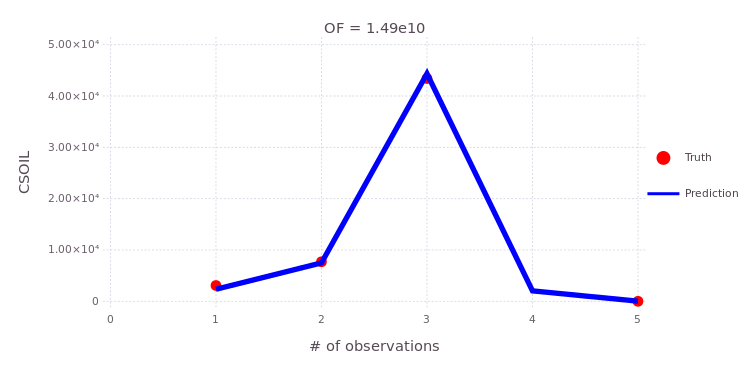

[SA:setup] /work/scripts/setup_working_directory.py --input-data-path /data/input-catalog/cru-ts40_ar5_rcp85_ncar-ccsm4_CALM_Toolik_LTER_10x10/ /data/workflows/single_run

[SA:setup] /work/scripts/runmask-util.py --reset --yx 0 0 /data/workflows/single_run/run-mask.nc

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on GPP m p

[SA:setup] /work/scripts/outspec_utils.py /data/workflows/single_run/config/output_spec.csv --on VEGC m p

[SA:setup] /work/scripts/outspec_utils.py --enable-cal-vars /data/workflows/single_run/config/output_spec.csv --on CMTNUM y

/data/workflows/single_run/config/output_spec.csv File present!
/data/workflows/single_run/config/config.js File present!
[SA:run] /work/dvmdostem --pr-yrs 100 --eq-yrs 2000 --sp-yrs 0 --tr-yrs 0 --sc-yrs 0 -l fatal --force-cmt 5 --ctrl-file /data/workflows/single_run/config/config.js

Loading calibration_targets from : ['/work/calibration']
Resetting path...
[SA:setup] /work/scripts/setup

In [5]:
Mads.plotmatches(md, calib_param, 
    xtitle="# of observations", ytitle="CSOIL",filename="CSOIL_matchplot.png")